In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import folium
from branca.colormap import linear

from gurobipy import * 

In [2]:
heliports = pd.read_csv('../data/shizuoka_heliports_full_splitlatlon.csv')
heliports

,№,地域,市町名,ヘリポート名称,所在地,緯度（10進法）,経度（10進法）,緯度（60進法）,経度（60進法）,サイズ,施設管理者,管理者TEL,管轄消防本部,消防TEL（患者搬送依頼先）,最寄の避難所,最寄の救護所,最寄の救護病院
0,1,賀茂,下田市,敷根公園健康広場,下田市敷根757,34.681667,138.931944,北緯34°40′54″,東経138°55′55″,大,下田市役所防災安全課,0558-36-4145,下田消防本部 下田消防署,0558-22-1829,下田中学校,下田メディカルセンター,下田メディカルセンター
1,2,賀茂,東伊豆町,東伊豆町営総合グラウンド(新),賀茂郡東伊豆町稲取3347,34.785833,139.039722,北緯34°47′09″,東経139°02′23″,大,東伊豆町教育委員会,0557-95-6207,駿東伊豆消防本部 東伊豆消防署,0557-95-0119,稲取中学校,伊豆東部総合病院,伊豆東部総合病院
2,3,賀茂,河津町,鉢の山セラピーロード第１駐車場,賀茂郡河津町川津筏場507-1,34.791667,138.978889,北緯34°47′30″,東経138°58′44″,大,河津町役場総務課,0558-34-1913,下田消防本部 河津分署,0558-22-1829,西小学校,伊豆今井浜病院,伊豆今井浜病院
3,4,賀茂,南伊豆町,差田グラウンド,賀茂郡南伊豆町入間16,34.646111,138.820278,北緯34°38′46″,東経138°49′13″,大,南伊豆町役場地域整備課,0558-62-6277,下田消防本部 南伊豆分署,0558-22-1829,南伊豆中学校,下田メディカルセンター,下田メディカルセンター
4,5,賀茂,松崎町,松崎高等学校グラウンド,賀茂郡松崎町桜田188,34.756389,138.789167,北緯34°45′23″,東経138°47′21″,大,松崎高等学校,0558-42-0131,下田消防本部 西伊豆消防署,0558-22-1829,松崎高等学校,西伊豆健育会病院,西伊豆健育会病院
5,6,賀茂,西伊豆町,黄金崎クリスタルパーク駐車場,賀茂郡西伊豆町宇久須2204-3,34.844670,138.768781,北緯34°50′40″,東経138°46′07″,大,西伊豆町役場,0558-52-1111,下田消防本部 西伊豆消防署,0558-22-1829,賀茂小学校,西伊豆中学校,西伊豆健育会病院
6,7,東部,沼津市,沼津市営野球場,沼津市泉町2-1,35.112222,138.862499,北緯35°06′44″,東経138°51′45″,大,沼津市教育委員会スポーツ振興課,055-922-7200,駿東伊豆消防本部 〈沼津北消防署〉,055-920-9102,市立第五中学校,第五地区センター,西島病院
7,8,東部,熱海市,熱海観光港芝生広場,熱海市和田浜南1694-29,35.091389,139.079444,北緯35°05′29″,東経139°04′46″,中,熱海市役所公園緑地室,0557-86-6240,熱海市消防本部,0557-81-2555,第二小学校,起雲閣,所記念病院
8,9,東部,三島市,長伏グラウンド北側駐車場,三島市長伏274-3,35.085278,138.912222,北緯35°05′07″,東経138°54′44″,大,三島市役所,055-975-3111,富士山南東消防本部 〈三島消防署〉,055-972-5803,長伏小学校,中郷西中学校,高野内科循環器科クリニック
9,10,東部,富士宮市,外神スポーツ広場,富士宮市外神東町114,35.259444,138.611389,北緯35°15′34″,東経138°36′41″,大,富士宮市役所,0544-22-1319,富士宮市消防本部,0544-22-1198,大富士中学校,大富士中学校,富士脳障害研究所附属病院


In [3]:
datarate = pd.read_csv('../results/22_data_rate_リスク度追加.csv')
datarate = datarate[datarate['カテゴリ'] == 'HighE_HighS'].copy()#今回の対象HighE_HighS

In [4]:
def label_max_coverage_by_index(
    heliports: pd.DataFrame,
    datarate: pd.DataFrame,
    radius_km: float = 12.0,
    lat_col_center: str = '緯度（10進法）',
    lon_col_center: str = '経度（10進法）',
    lat_col_point: str = 'lat',
    lon_col_point: str = 'lon',
    out_col: str = 'coverage_id'
):
    """
    1) 貪欲に中心（heliports）を選んで未割当点をカバー最大化
    2) ラベル付けは「選ばれた中心の中で最も近い中心の heliports.index」を付与
       半径外は None。距離同着なら中心 index が小さい方。
    戻り値: (out_df, selected_info)
      - out_df: datarate + coverage_id（= heliports.index or None）
      - selected_info: 選ばれた中心一覧（center_index, lat, lon, covered_count は“最近傍割当後”の数）
    """
    # ---- 前処理（ラジアン座標）
    centers_lat = np.radians(heliports[lat_col_center].to_numpy(dtype=float))
    centers_lon = np.radians(heliports[lon_col_center].to_numpy(dtype=float))
    points_lat  = np.radians(datarate[lat_col_point].to_numpy(dtype=float))
    points_lon  = np.radians(datarate[lon_col_point].to_numpy(dtype=float))

    # ハーバサイン距離（全中心×全点）
    R = 6371.0088
    dlat = centers_lat[:, None] - points_lat[None, :]
    dlon = centers_lon[:, None] - points_lon[None, :]
    a = np.sin(dlat/2)**2 + np.cos(centers_lat)[:, None] * np.cos(points_lat)[None, :] * np.sin(dlon/2)**2
    dist_km = 2 * R * np.arcsin(np.sqrt(a))  # shape: (n_centers, n_points)

    within = dist_km <= radius_km
    n_centers, n_points = within.shape

    # ---- 1) 中心選択（貪欲）：未割当点を最も多くカバーできる中心を順に追加
    uncovered = np.ones(n_points, dtype=bool)
    chosen_mask = np.zeros(n_centers, dtype=bool)  # 選ばれた中心フラグ

    while uncovered.any():
        cover_counts = within[:, uncovered].sum(axis=1)  # 各中心が今カバーできる未割当点数
        best_center = int(np.argmax(cover_counts))
        best_count = int(cover_counts[best_center])
        if best_count == 0:
            break
        chosen_mask[best_center] = True
        # その中心がカバーできる未割当点を一旦「カバー済み」にする（割当はまだしない）
        newly = within[best_center] & uncovered
        uncovered[newly] = False

    chosen_idx = np.where(chosen_mask)[0]
    # 1つも選ばれなかった場合（全点が半径外）は全て None
    out_df = datarate.copy()
    labels = np.array([None] * n_points, dtype=object)

    if len(chosen_idx) > 0:
        # ---- 2) ラベル付け：選ばれた中心の中で最近傍を選ぶ（半径内に限定）
        # dist_sub: (n_chosen, n_points)
        dist_sub = dist_km[chosen_idx, :]
        within_sub = within[chosen_idx, :]

        # 半径外の点は全て False → そういう点は None のまま
        # 最近傍中心（距離最小、同着なら chosen_idx の中で小さいインデックス＝元centerのインデックス昇順）
        # argmin は“距離に大きなペナルティを与える”手で半径外を除外
        big = 1e9
        penalized = np.where(within_sub, dist_sub, big)
        nearest_pos = penalized.argmin(axis=0)                # どの chosen の行か（0..n_chosen-1）
        nearest_dist = penalized.min(axis=0)

        # 半径内ならラベル付与（= heliports.index の実インデックス）
        in_radius = nearest_dist < big
        nearest_center_rows = chosen_idx[nearest_pos[in_radius]]  # heliports の行番号（0..n_centers-1）
        nearest_center_index = heliports.index.to_numpy()[nearest_center_rows]
        labels[in_radius] = nearest_center_index

        # ---- covered_count を“最近傍割当後”で再集計
        covered_count = {int(idx): 0 for idx in nearest_center_index}  # 初期化
        for v in labels[in_radius]:
            covered_count[int(v)] = covered_count.get(int(v), 0) + 1

        selected_info = []
        for r in chosen_idx:
            center_index = int(heliports.index[r])
            selected_info.append({
                "center_index": center_index,
                "lat": float(heliports.iloc[r][lat_col_center]),
                "lon": float(heliports.iloc[r][lon_col_center]),
                "covered_count": int(covered_count.get(center_index, 0))
            })
    else:
        selected_info = []

    out_df[out_col] = labels
    return out_df, selected_info


In [22]:
# datarateに coverage_id がついた状態を out_df と仮定してヒストグラムを作図
def plot_coverage_histogram(out_df, coverage_col="coverage_id"):
    counts = out_df[coverage_col].value_counts(dropna=False).sort_index()

    plt.figure(figsize=(9, 3))

    ax = counts.plot(kind="bar")
    ax.set_xlabel("coverage_id")
    ax.set_ylabel("count")
    ax.set_title("Coverage Histogram")

    # 横軸ラベルを数値化して +1 する
    new_labels = [str(int(label.get_text()) + 1) for label in ax.get_xticklabels()]
    ax.set_xticklabels(new_labels)

    plt.tight_layout()
    plt.show()

    print(counts)

In [6]:
def plot_folium_coverage(
    out_df: pd.DataFrame,
    heliports: pd.DataFrame,
    centers_used: list,
    radius_km: float = 12.0,
    lat_col_point: str = "lat",
    lon_col_point: str = "lon",
    lat_col_center: str = "緯度（10進法）",
    lon_col_center: str = "経度（10進法）",
    coverage_col: str = "coverage_id",
    html_path: str = "../results/22_1_coverage_map.html",
):
    """
    Folium で被覆結果を可視化（1始まりID & 未選出でもID表示）
      - datarate（out_df）: coverage_id に応じた色で点を描画。未被覆は灰色。
      - centers_used: 選ばれた中心を半径 radius_km の円で描画。
        旧: {"coverage_id": 1..K, "center_index": heliports.index, ...}
        新: {"center_index": heliports.index, ...}  ※coverage_id列は無し
      - heliports: 全候補を薄ピンと 1始まりID ラベルで表示（未選出でもIDが見える）
    出力: folium.Map オブジェクト。HTML も保存します。
    """

    # --- 1始まりIDの割り当て（heliports の現在の index -> 1..N）
    index_to_id = {idx: i + 1 for i, idx in enumerate(heliports.index)}
    id_to_index = {v: k for k, v in index_to_id.items()}  # 必要なら逆引き

    # --- centers_used のキー互換：coverage_id が無ければ center_index をkeyに使う（どちらも heliports.index を想定）
    def _center_key(c):
        return c.get("coverage_id", c.get("center_index"))

    cid_to_center = {_center_key(c): c for c in (centers_used or [])}

    # --- マップ中心（データ平均）
    if len(out_df) > 0:
        m_lat = float(out_df[lat_col_point].mean())
        m_lon = float(out_df[lon_col_point].mean())
    elif len(heliports) > 0:
        m_lat = float(heliports[lat_col_center].mean())
        m_lon = float(heliports[lon_col_center].mean())
    else:
        m_lat, m_lon = 35.0, 135.0  # fallback: Japan area

    m = folium.Map(
        location=[m_lat, m_lon],
        zoom_start=8,
        control_scale=True,
        tiles="CartoDB positron",
    )

    # --- レイヤ: 全ヘリポート（薄いピン + 1始まりIDのラベル）
    fg_heli = folium.FeatureGroup(name="Heliports (all candidates)", show=False)
    for _, row in heliports.reset_index().iterrows():
        idx = row["index"]  # 元の heliports.index
        disp_id = index_to_id.get(idx, None)
        lat_c = float(row[lat_col_center])
        lon_c = float(row[lon_col_center])

        # 薄ピン
        folium.CircleMarker(
            location=[lat_c, lon_c],
            radius=3,
            color="#999999",
            fill=True,
            fill_opacity=0.5,
            tooltip=f"heliport ID={disp_id} (index={idx})",
        ).add_to(fg_heli)

        # 1始まりIDの小さなラベル（未選出でも見えるように）
        folium.Marker(
            location=[lat_c, lon_c],
            icon=folium.DivIcon(
                html=f"""<div style="font-size:11px; color:#555; font-weight:bold;">{disp_id}</div>"""
            ),
        ).add_to(fg_heli)

    fg_heli.add_to(m)

    # --- レイヤ: 選ばれた中心（円）
    fg_cov = folium.FeatureGroup(name=f"Coverage Circles (r={radius_km} km)", show=True)
    for key, c in cid_to_center.items():
        # key は heliports.index（0/任意値）→ 表示は 1始まりID に変換
        disp_id = index_to_id.get(key, None)

        # 位置は centers_used に lat/lon があれば優先、無ければ heliports から取得
        lat_c = c.get("lat", float(heliports.loc[key, lat_col_center]) if key in heliports.index else None)
        lon_c = c.get("lon", float(heliports.loc[key, lon_col_center]) if key in heliports.index else None)
        if lat_c is None or lon_c is None:
            continue

        folium.Circle(
            location=[lat_c, lon_c],
            radius=radius_km * 1000.0,
            color="#000000",
            weight=1.5,
            fill=False,
            opacity=0.7,
            tooltip=f"center_id={disp_id} | covered={c.get('covered_count','?')}",
        ).add_to(fg_cov)

        # 円の中央にも太字ラベル（1始まりID）
        folium.Marker(
            location=[lat_c, lon_c],
            icon=folium.DivIcon(
                html=f"""<div style="font-size:12px; color:#000; font-weight:bold;">{disp_id}</div>"""
            ),
        ).add_to(fg_cov)

    fg_cov.add_to(m)

    # --- レイヤ: datarate points colored by coverage_id（= heliports の index を想定）
    fg_pts = folium.FeatureGroup(name="datarate points", show=True)

    # coverage_id を数値化（NaN除く）。新仕様では heliports の index 値が入る想定。
    coverage_vals = pd.to_numeric(out_df[coverage_col], errors="coerce")
    unique_idx_vals = sorted(pd.Series(coverage_vals.dropna().unique()).astype(int).tolist())

    # カラーマップは「表示ID(=1始まり)」基準で安定
    unique_disp_ids = [index_to_id.get(idx_v) for idx_v in unique_idx_vals if idx_v in index_to_id]

    color_for = None
    cmap = None
    if unique_disp_ids:
        if len(unique_disp_ids) <= 9:
            cmap = linear.Set1_09.scale(min(unique_disp_ids), max(unique_disp_ids))
            color_for = lambda disp_id: cmap(disp_id)
        else:
            # 多色用：HSVで均等割り
            def _hsv_color(n, i):
                import colorsys
                hue = i / max(n, 1)
                r, g, b = colorsys.hsv_to_rgb(hue, 0.65, 0.9)
                return f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}"
            palette = {d: _hsv_color(len(unique_disp_ids), k) for k, d in enumerate(sorted(unique_disp_ids))}
            color_for = lambda disp_id: palette.get(int(disp_id), "#3388ff")

    for i, row in out_df.iterrows():
        lat = float(row[lat_col_point])
        lon = float(row[lon_col_point])
        cid_raw = row.get(coverage_col, None)  # heliports.index（NaN可）

        if pd.isna(cid_raw):
            # 未被覆は灰色（ドキュストリング準拠）
            color = "#FF0000"
            fill_op = 0.4
            tooltip = f"idx={i} | covered_by=None"
        else:
            idx_int = int(cid_raw)
            disp_id = index_to_id.get(idx_int, idx_int)  # 既知なら1始まり、未知ならそのまま
            color = color_for(disp_id) if color_for else "#3388ff"
            fill_op = 0.8
            center_info = cid_to_center.get(idx_int)
            tip_extra = f" center_id={disp_id}"
            if center_info and "covered_count" in center_info:
                tip_extra += f" | center_covered={center_info['covered_count']}"
            tooltip = f"idx={i} | covered_by={disp_id}{tip_extra}"

        folium.CircleMarker(
            location=[lat, lon],
            radius=4,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=fill_op,
            tooltip=tooltip,
        ).add_to(fg_pts)

    fg_pts.add_to(m)

    # 凡例（カラーバー）※HSVモードのときは簡易凡例としてユニーク数のみ表示
    if cmap is not None:
        cmap.caption = "Heliport ID (1-based)"
        m.add_child(cmap)

    folium.LayerControl(collapsed=False).add_to(m)
    m.save(html_path)
    return m, html_path

In [7]:
datarate, centers_used = label_max_coverage_by_index(heliports, datarate, radius_km=12.0)
datarate

,MESH_ID,SHICODE,geometry,lon,lat,道路,病院,避難所,人口,75歳以上人口比率,...,0～14歳人口比率z,津波z,洪水z,土砂z,地震z,曝露,社会的脆弱性,リスク度,カテゴリ,coverage_id
2,513775993,22134,"POLYGON ((137.7375 34.6625, 137.7375 34.666666...",137.740625,34.664583,10,6.729339,1.382903,637.9110,0.2274,...,-0.355601,6.713753,-0.399036,-0.672381,1.543601,7.185937,0.422585,7.608522,HighE_HighS,37
6,513776814,22134,"POLYGON ((137.76875 34.654166666666676, 137.76...",137.771875,34.656250,27,9.247762,0.753859,1585.3317,0.2429,...,0.392136,1.782247,-0.399036,-0.672381,1.551792,2.262622,0.940875,3.203497,HighE_HighS,37
7,513776821,22134,"POLYGON ((137.775 34.65, 137.775 34.6541666666...",137.778125,34.652083,10,9.979212,1.443699,123.5096,0.3822,...,-0.432056,8.289645,-0.399036,-0.672381,1.556556,8.774785,0.734085,9.508869,HighE_HighS,37
27,513776943,22211,"POLYGON ((137.8 34.6625, 137.8 34.666666666666...",137.803125,34.664583,13,10.238021,0.075790,190.7649,0.7514,...,-0.846446,0.166774,-0.399036,-0.672381,1.610098,0.705455,1.376123,2.081578,HighE_HighS,48
31,513776962,22211,"POLYGON ((137.83125 34.65833333333334, 137.831...",137.834375,34.660417,7,12.231741,1.487434,4.6307,0.0769,...,3.075730,1.778012,-0.352011,-0.672381,1.696112,2.449732,2.581197,5.030929,HighE_HighS,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,523940573,22205,"POLYGON ((139.0875 35.045833333333334, 139.087...",139.090625,35.047917,7,6.250801,0.178833,784.2896,0.3836,...,-0.676714,6.119622,-0.399036,0.400248,0.459221,6.580054,0.664450,7.244504,HighE_HighS,7
11239,523950373,22205,"POLYGON ((139.0875 35.1125, 139.0875 35.116666...",139.090625,35.114583,9,1.355553,0.617395,307.2372,0.6742,...,-0.916785,0.440662,-0.399036,0.608015,0.454089,1.103730,1.011194,2.114924,HighE_HighS,7
11265,523950584,22205,"POLYGON ((139.10625 35.12916666666666, 139.106...",139.109375,35.131250,4,3.846023,2.670109,108.6232,0.3922,...,-1.088046,0.337137,-0.399036,1.047157,0.447795,1.433053,1.261943,2.694996,HighE_HighS,7
11282,523950684,22205,"POLYGON ((139.10625 35.1375, 139.10625 35.1416...",139.109375,35.139583,3,4.615108,2.647562,25.1769,0.4434,...,-1.270010,0.978957,-0.399036,1.360075,0.420674,2.360670,1.434257,3.794927,HighE_HighS,7


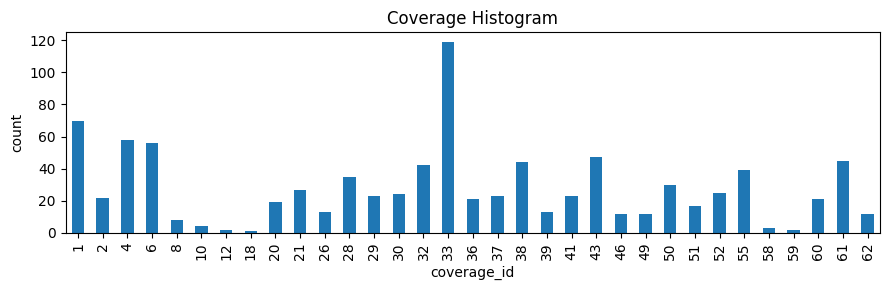

coverage_id
0      70
1      22
3      58
5      56
7       8
9       4
11      2
17      1
19     19
20     27
25     13
27     35
28     23
29     24
31     42
32    119
35     21
36     23
37     44
38     13
40     23
42     47
45     12
48     12
49     30
50     17
51     25
54     39
57      3
58      2
59     21
60     45
61     12
Name: count, dtype: int64


In [23]:
plot_coverage_histogram(datarate)

In [9]:
# もし変数 out_df, heliports, centers_used が存在していれば、即座に地図を出力して保存
fmap, path = plot_folium_coverage(datarate, heliports, centers_used, radius_km=12.0)


In [10]:
# --- 共通: 球面距離（haversine, km） ---
def haversine_km(lat1, lon1, lat2, lon2, R=6371.0088):
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return 2*R*np.arcsin(np.sqrt(a))

# --- 1) 自由配置: 未被覆点そのものを候補にする greedy 最小被覆 ---
def greedy_min_cover_freeplacement(uncovered_df, radius_km=12.0, lat_col="lat", lon_col="lon"):
    """
    未被覆点（uncovered_df）を全て半径 radius_km でカバーするのに必要な
    追加拠点（緯度経度）を、貪欲法で近似的に最小個数選ぶ。
    候補中心は未被覆点自身。
    戻り値: (centers, assign_idx)
      centers: list[dict]  [{"new_id": 1, "lat": ..., "lon": ..., "covered_count": n}, ...]
      assign_idx: np.array shape(n_points,)  # 各点がどの new_id に割当てられたか（1..K）。未割当は0（理論上発生しない）
    """
    pts_lat = uncovered_df[lat_col].to_numpy(dtype=float)
    pts_lon = uncovered_df[lon_col].to_numpy(dtype=float)
    n = len(uncovered_df)
    if n == 0:
        return [], np.array([], dtype=int)

    # 距離行列 (n x n) を事前計算
    dmat = haversine_km(pts_lat[:,None], pts_lon[:,None], pts_lat[None,:], pts_lon[None,:])
    within = dmat <= radius_km  # bool (n,n)

    remaining = np.ones(n, dtype=bool)
    assign = np.zeros(n, dtype=int)
    centers = []
    new_id = 0

    while remaining.any():
        # まだ未割当に対して、各候補（各点）でカバーできる未割当点数を集計
        cover_counts = (within & remaining[None, :])[:, remaining].sum(axis=1)
        # 最大を与える候補（複数同着は最小インデックス）
        best = int(np.argmax(cover_counts))
        best_count = int(cover_counts[best])
        if best_count == 0:
            break

        new_id += 1
        mask = within[best] & remaining
        assign[mask] = new_id
        remaining[mask] = False

        centers.append({
            "new_id": new_id,
            "lat": float(pts_lat[best]),
            "lon": float(pts_lon[best]),
            "covered_count": int(mask.sum())
        })

    return centers, assign



# ===== Gurobi 版（厳密最適化） =====
def gurobi_min_cover_freeplacement(uncovered_df,
                                   radius_km=12.0,
                                   lat_col="lat",
                                   lon_col="lon",
                                   mip_gap=0.0,
                                   time_limit=None,
                                   output=False):
    """
    Gurobi で Set Cover を厳密解（または指定MIPGAP内の最適）として解く。
      - 候補中心は未被覆点自身
      - 各点 i は少なくとも1つの選択中心 j に半径内で覆われる: sum_j A[i,j] x_j >= 1
      - 目的: 選ぶ中心数を最小化 (min sum_j x_j)
    戻り値: (centers, assign_idx)
      centers: [{"new_id": 1..K, "lat":..., "lon":..., "covered_count": n}, ...]
      assign_idx: np.array shape(n_points,), 各点がどの new_id に割り当てられたか（最近傍の採択中心）
    """
    try:
        import gurobipy as gp
        from gurobipy import GRB
    except Exception as e:
        raise ImportError("gurobipy が使用できません。環境に Gurobi とライセンスを設定してください。") from e

    # 座標と距離行列
    pts_lat = uncovered_df[lat_col].to_numpy(dtype=float)
    pts_lon = uncovered_df[lon_col].to_numpy(dtype=float)
    n = len(uncovered_df)
    if n == 0:
        return [], np.array([], dtype=int)

    dmat = haversine_km(pts_lat[:,None], pts_lon[:,None], pts_lat[None,:], pts_lon[None,:])
    within = (dmat <= radius_km)  # (n,n) bool
    # 各点 i は自分自身 j=i で必ず within True（距離0）なので常に実行可能

    # モデル
    m = gp.Model("min_set_cover_freeplacement")
    m.Params.OutputFlag = 1 if output else 0
    if time_limit is not None:
        m.Params.TimeLimit = float(time_limit)
    if mip_gap is not None:
        m.Params.MIPGap = float(mip_gap)

    # 変数 x_j ∈ {0,1} : 点 j を中心として選ぶか
    x = m.addMVar(n, vtype=GRB.BINARY, name="x")

    # 制約: 各点 i は少なくとも1つの選択中心でカバー
    # within[i,:] は True/False → 0/1 にキャストして内積
    A = within.astype(float)
    for i in range(n):
        m.addConstr(A[i, :] @ x >= 1.0, name=f"cover[{i}]")

    # 目的: 選ぶ中心数を最小化
    m.setObjective(x.sum(), GRB.MINIMIZE)

    m.optimize()

    if m.status not in (GRB.OPTIMAL, GRB.TIME_LIMIT):
        raise RuntimeError(f"Gurobi optimization did not finish successfully (status={m.status}).")

    # 採択された中心のインデックス
    chosen = [j for j in range(n) if x.X[j] > 0.5]
    # new_id を決める（安定化のため「元インデックス昇順」で 1..K を付与）
    chosen_sorted = sorted(chosen)
    id_map = {j: k+1 for k, j in enumerate(chosen_sorted)}

    # 各点を「最近傍の採択中心」に割り当て（同距離なら小さいインデックス）
    assign_idx = np.zeros(n, dtype=int)
    for i in range(n):
        # i をカバー可能な chosen の中から最短距離を選ぶ
        feas = [j for j in chosen_sorted if within[i, j]]
        if not feas:
            # 理論上発生しない（少なくとも自分自身で覆える）
            assign_idx[i] = 0
            continue
        # 最近傍
        dists = [(dmat[i, j], j) for j in feas]
        d_min, j_star = min(dists, key=lambda t: (t[0], t[1]))
        assign_idx[i] = id_map[j_star]

    # centers を new_id 順で作成し、covered_count を集計
    centers = []
    for j in chosen_sorted:
        new_id = id_map[j]
        count = int((assign_idx == new_id).sum())
        centers.append({
            "new_id": int(new_id),
            "lat": float(pts_lat[j]),
            "lon": float(pts_lon[j]),
            "covered_count": count
        })

    return centers, assign_idx

In [11]:
# 1) 未被覆
uc = datarate[datarate['coverage_id'].isna()].copy()

# 2) 自由配置で最小被覆（未被覆点から中心を貪欲に選ぶ）
new_centers, assign_idx = gurobi_min_cover_freeplacement(uc, radius_km=12.0, lat_col="lat", lon_col="lon")#greedy_min_cover_freeplacement(uc, radius_km=12.0, lat_col="lat", lon_col="lon")
K = len(new_centers)

if K == 0:
    print("未被覆の追加拠点は不要です。")
else:
    # 3) 既存 heliports の index に衝突しない新しい整数IDを作る（←これを唯一の出所にする）
    #    既存indexが整数でない可能性に備えて、数値に変換して最大値を取る
    try:
        base = int(pd.to_numeric(pd.Index(heliports.index), errors="coerce").max())
        if np.isnan(base):
            base = len(heliports) - 1
    except Exception:
        base = len(heliports) - 1

    new_ids = [base + i + 1 for i in range(K)]  # 例: [101,102,...]

    # 4) datarate の未被覆行に new_id を書き戻す
    #    assign_idx は 1..K なので、それを new_ids に置き換える
    id_map = {i+1: new_ids[i] for i in range(K)}
    datarate.loc[uc.index, "coverage_id"] = (
        pd.Series(assign_idx, index=uc.index).replace(id_map).astype("Int64")
    )

    # 5) heliports にも同じ new_ids を index として追記（←ここでズレない）
    df_new_heli = pd.DataFrame(
        {
            "№":[id_map[m]-1 for m in id_map], 
            "緯度（10進法）": [c["lat"] for c in new_centers],
            "経度（10進法）": [c["lon"] for c in new_centers],
        },
        index=new_ids
    )
    heliports = pd.concat([heliports, df_new_heli])

    # 6) チェック（任意）
    added_ids_in_datarate = set(datarate.loc[uc.index, "coverage_id"].dropna().astype(int).unique().tolist())
    assert set(new_ids) <= set(heliports.index.tolist()), "heliportsに追加されたindexと不整合です"
    assert added_ids_in_datarate.issubset(set(new_ids)), "datarateに書いたIDがnew_idsと一致していません"

    print(f"追加拠点 {K} 件を heliports に追記し、datarate['coverage_id'] を更新しました。")

lat_col_center = "緯度（10進法）"
lon_col_center = "経度（10進法）"

# datarate から使用中の拠点とカバー数を集計
used = (
    datarate["coverage_id"]
    .dropna()
    .astype(int)
    .value_counts()
    .sort_index()
)

centers_used = []
for idx, cnt in used.items():
    if idx in heliports.index:
        centers_used.append({
            "center_index": int(idx),
            "lat": float(heliports.loc[idx, lat_col_center]),
            "lon": float(heliports.loc[idx, lon_col_center]),
            "covered_count": int(cnt)
        })



Set parameter Username
Set parameter LicenseID to value 2688530
Academic license - for non-commercial use only - expires 2026-07-16
追加拠点 5 件を heliports に追記し、datarate['coverage_id'] を更新しました。


In [12]:
# もし変数 out_df, heliports, centers_used が存在していれば、即座に地図を出力して保存
fmap, path = plot_folium_coverage(datarate, heliports, centers_used, radius_km=12.0,html_path = "../results/22_2_coverage_map.html")


In [13]:
pd.DataFrame(new_centers)

,new_id,lat,lon,covered_count
0,1,34.922917,137.684375,3
1,2,34.918750,138.084375,2
2,3,35.014583,138.265625,21
3,4,35.110417,138.371875,45
4,5,35.260417,138.328125,12
